# Group Project Data Analytics EarthQuakes Japan ![Japan]
[Japan]: https://flagcdn.com/40x30/jp.png

# 1 - Import Libraries and data

In [1]:
from datetime import datetime
import requests
import json
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('earthquakes japan.tsv',sep='\t')

In [3]:
data

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,"[""Year >= 1900"",""Country = JAPAN""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1900.0,1.0,11.0,9.0,7.0,0.0,NaN,NaN,JAPAN: SEA OF JAPAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1901.0,6.0,15.0,NaN,NaN,0.0,1278.0,NaN,"IWATE, JAPAN",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1901.0,6.0,24.0,7.0,2.0,0.0,1279.0,NaN,JAPAN: RYUKYU ISLANDS,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,1901.0,8.0,9.0,9.0,23.0,30.0,1281.0,NaN,JAPAN: OFF NORTHEAST COAST HONSHU,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,NaN,2019.0,6.0,18.0,13.0,22.0,19.0,5712.0,NaN,JAPAN: NIIGATA PREFECTURE,...,NaN,NaN,28.0,1.0,NaN,2.0,NaN,NaN,144.0,3.0
244,NaN,2021.0,2.0,13.0,14.0,7.0,50.0,5823.0,NaN,JAPAN: OFF FUKUSHIMA,...,NaN,NaN,186.0,3.0,7700.0,4.0,798.0,3.0,19758.0,4.0
245,NaN,2021.0,3.0,20.0,9.0,9.0,43.0,NaN,NaN,JAPAN: HONSHU ISLAND,...,NaN,NaN,11.0,1.0,550.0,4.0,NaN,NaN,NaN,NaN
246,NaN,2022.0,3.0,16.0,14.0,36.0,33.0,5832.0,NaN,JAPAN: OFF FUKUSHIMA,...,NaN,NaN,247.0,3.0,8800.0,4.0,217.0,3.0,56718.0,4.0


# 2 - Extract all the pieces information that are needed and Transform the dataset

In [4]:
data = data.drop(['Search Parameters', 'Sec'], axis=1) # We drop the Search Parameters and sec (seconds) columns that we will not use in our data set

In [5]:
data = data.drop(0,axis=0)   # Drop of the first row (full nan)

In [6]:
data.loc[:, ['Hr', 'Mn']] = data.loc[:, ['Hr', 'Mn']].fillna(0) # Fill with 0 nan on Hr and Mn

In [7]:
data.head()

,Year,Mo,Dy,Hr,Mn,Tsu,Vol,Location Name,Latitude,Longitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,1900.0,1.0,11.0,9.0,7.0,NaN,NaN,JAPAN: SEA OF JAPAN,36.5,133.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1901.0,6.0,15.0,0.0,0.0,1278.0,NaN,"IWATE, JAPAN",39.0,143.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1901.0,6.0,24.0,7.0,2.0,1279.0,NaN,JAPAN: RYUKYU ISLANDS,27.0,130.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,1901.0,8.0,9.0,9.0,23.0,1281.0,NaN,JAPAN: OFF NORTHEAST COAST HONSHU,40.5,142.5,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
5,1901.0,8.0,9.0,18.0,33.0,1282.0,NaN,JAPAN: OFF NORTHEAST COAST HONSHU,40.6,142.3,...,NaN,NaN,NaN,NaN,NaN,2.0,8.0,1.0,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 1 to 247
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                247 non-null    float64
 1   Mo                                  247 non-null    float64
 2   Dy                                  247 non-null    float64
 3   Hr                                  247 non-null    float64
 4   Mn                                  247 non-null    float64
 5   Tsu                                 164 non-null    float64
 6   Vol                                 8 non-null      float64
 7   Location Name                       247 non-null    object 
 8   Latitude                            247 non-null    float64
 9   Longitude                           247 non-null    float64
 10  Focal Depth (km)                    232 non-null    float64
 11  Mag                                 216 non-n

We combine the Year, Mo, Dy, Hr and Mn columns to a general datetime

In [9]:
# Function to create datetime objects
def create_datetime(row):
    if pd.isnull(row['Year']) or pd.isnull(row['Mo']) or pd.isnull(row['Dy']):
        return pd.NaT
    return datetime(int(row['Year']), int(row['Mo']), int(row['Dy']), int(row['Hr']), int(row['Mn']))

# Create column of combined date and time
data['Datetime'] = data.apply(create_datetime, axis=1)

In [10]:
# Dropped Year Mo Dy Hr and Mn columns to keep only datetime in replacement.
data.drop(['Year', 'Mo', 'Dy', 'Hr', 'Mn'], axis=1, inplace=True)

In [11]:
data

,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,...,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Datetime
1,NaN,NaN,JAPAN: SEA OF JAPAN,36.500,133.500,NaN,7.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-11 09:07:00
2,1278.0,NaN,"IWATE, JAPAN",39.000,143.000,33.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901-06-15 00:00:00
3,1279.0,NaN,JAPAN: RYUKYU ISLANDS,27.000,130.000,60.0,7.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1901-06-24 07:02:00
4,1281.0,NaN,JAPAN: OFF NORTHEAST COAST HONSHU,40.500,142.500,33.0,7.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1901-08-09 09:23:00
5,1282.0,NaN,JAPAN: OFF NORTHEAST COAST HONSHU,40.600,142.300,33.0,8.2,NaN,18.0,1.0,...,NaN,NaN,NaN,NaN,2.0,8.0,1.0,NaN,NaN,1901-08-09 18:33:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,5712.0,NaN,JAPAN: NIIGATA PREFECTURE,38.646,139.472,12.0,6.4,NaN,NaN,NaN,...,NaN,28.0,1.0,NaN,2.0,NaN,NaN,144.0,3.0,2019-06-18 13:22:00
244,5823.0,NaN,JAPAN: OFF FUKUSHIMA,37.745,141.749,49.0,7.1,9.0,1.0,1.0,...,NaN,186.0,3.0,7700.0,4.0,798.0,3.0,19758.0,4.0,2021-02-13 14:07:00
245,NaN,NaN,JAPAN: HONSHU ISLAND,38.452,141.648,43.0,7.0,7.0,NaN,NaN,...,NaN,11.0,1.0,550.0,4.0,NaN,NaN,NaN,NaN,2021-03-20 09:09:00
246,5832.0,NaN,JAPAN: OFF FUKUSHIMA,37.702,141.587,63.0,7.3,9.0,4.0,1.0,...,NaN,247.0,3.0,8800.0,4.0,217.0,3.0,56718.0,4.0,2022-03-16 14:36:00


We have few missing values ​​in the Magnitude column, so these rows will be left out of our data set.

In [12]:
data = data.dropna(subset=['Mag'])
data

,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,...,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Datetime
1,NaN,NaN,JAPAN: SEA OF JAPAN,36.500,133.500,NaN,7.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-11 09:07:00
3,1279.0,NaN,JAPAN: RYUKYU ISLANDS,27.000,130.000,60.0,7.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1901-06-24 07:02:00
4,1281.0,NaN,JAPAN: OFF NORTHEAST COAST HONSHU,40.500,142.500,33.0,7.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1901-08-09 09:23:00
5,1282.0,NaN,JAPAN: OFF NORTHEAST COAST HONSHU,40.600,142.300,33.0,8.2,NaN,18.0,1.0,...,NaN,NaN,NaN,NaN,2.0,8.0,1.0,NaN,NaN,1901-08-09 18:33:00
6,1283.0,NaN,JAPAN: OFF NORTHEAST COAST HONSHU,40.500,142.500,33.0,6.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901-08-09 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,5712.0,NaN,JAPAN: NIIGATA PREFECTURE,38.646,139.472,12.0,6.4,NaN,NaN,NaN,...,NaN,28.0,1.0,NaN,2.0,NaN,NaN,144.0,3.0,2019-06-18 13:22:00
244,5823.0,NaN,JAPAN: OFF FUKUSHIMA,37.745,141.749,49.0,7.1,9.0,1.0,1.0,...,NaN,186.0,3.0,7700.0,4.0,798.0,3.0,19758.0,4.0,2021-02-13 14:07:00
245,NaN,NaN,JAPAN: HONSHU ISLAND,38.452,141.648,43.0,7.0,7.0,NaN,NaN,...,NaN,11.0,1.0,550.0,4.0,NaN,NaN,NaN,NaN,2021-03-20 09:09:00
246,5832.0,NaN,JAPAN: OFF FUKUSHIMA,37.702,141.587,63.0,7.3,9.0,4.0,1.0,...,NaN,247.0,3.0,8800.0,4.0,217.0,3.0,56718.0,4.0,2022-03-16 14:36:00


In [13]:
# Replace null values ​​in 'Tsu' and 'Vol' (Tsunami and Volcano) and assign  true or false
data.loc[:,'Tsu'] = data['Tsu'].notnull()
data.loc[:,'Vol'] = data['Vol'].notnull()

Assigning the columns to a neater place

In [14]:
columns = data.columns.tolist()
column_to_move = columns.pop(columns.index('Datetime'))
columns.insert(0, column_to_move)
data = data[columns]

In [15]:
columns = data.columns.tolist()
column_to_move = columns.pop(columns.index('Location Name'))
columns.insert(1, column_to_move)
data = data[columns]

In [16]:
data.reset_index(drop=True, inplace=True)

In [17]:
data

,Datetime,Location Name,Tsu,Vol,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,1900-01-11 09:07:00,JAPAN: SEA OF JAPAN,False,False,36.500,133.500,NaN,7.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1901-06-24 07:02:00,JAPAN: RYUKYU ISLANDS,True,False,27.000,130.000,60.0,7.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1901-08-09 09:23:00,JAPAN: OFF NORTHEAST COAST HONSHU,True,False,40.500,142.500,33.0,7.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
3,1901-08-09 18:33:00,JAPAN: OFF NORTHEAST COAST HONSHU,True,False,40.600,142.300,33.0,8.2,NaN,18.0,...,NaN,NaN,NaN,NaN,NaN,2.0,8.0,1.0,NaN,NaN
4,1901-08-09 20:00:00,JAPAN: OFF NORTHEAST COAST HONSHU,True,False,40.500,142.500,33.0,6.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2019-06-18 13:22:00,JAPAN: NIIGATA PREFECTURE,True,False,38.646,139.472,12.0,6.4,NaN,NaN,...,NaN,NaN,28.0,1.0,NaN,2.0,NaN,NaN,144.0,3.0
212,2021-02-13 14:07:00,JAPAN: OFF FUKUSHIMA,True,False,37.745,141.749,49.0,7.1,9.0,1.0,...,NaN,NaN,186.0,3.0,7700.0,4.0,798.0,3.0,19758.0,4.0
213,2021-03-20 09:09:00,JAPAN: HONSHU ISLAND,False,False,38.452,141.648,43.0,7.0,7.0,NaN,...,NaN,NaN,11.0,1.0,550.0,4.0,NaN,NaN,NaN,NaN
214,2022-03-16 14:36:00,JAPAN: OFF FUKUSHIMA,True,False,37.702,141.587,63.0,7.3,9.0,4.0,...,NaN,NaN,247.0,3.0,8800.0,4.0,217.0,3.0,56718.0,4.0


Text(0, 0.5, 'Number of times')

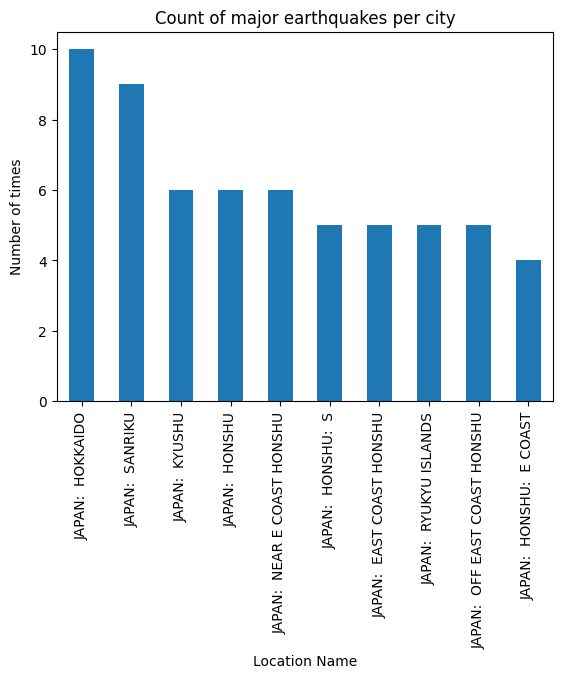

In [18]:
# Largest number of major earthquakes per city in the last 120 years

ax= data['Location Name'].value_counts() \
    .head(10) \
    .plot(kind='bar',title='Count of major earthquakes per city')

ax.set_xlabel('Location Name')
ax.set_ylabel('Number of times')

# 3 - Import the dataframe into .csv file

In [19]:
data.to_csv(r'data japan for analysis.csv',index=False, header=True)